## Association Rule Mining - Data Mining


In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [14]:
#read csv file
df = pd.read_csv('oridataset.csv')
display(df)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


## Data Exploration

In [15]:
#statistics summary
print(df.describe())

                1           2           3           4           5           6  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.620690    1.600000    1.944828    3.572414    1.662069    1.600000   
std      0.613154    0.491596    0.537216    0.805750    0.474644    0.491596   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    3.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    4.000000    2.000000    2.000000   
max      3.000000    2.000000    3.000000    5.000000    2.000000    2.000000   

                7           8           9          10  ...          23  \
count  145.000000  145.000000  145.000000  145.000000  ...  145.000000   
mean     1.579310    1.627586    1.620690    1.731034  ...    1.337931   
std      0.495381    1.020245    1.061112    0.7

In [16]:
#check data types
df.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

In [17]:
print(df.isnull().sum())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64


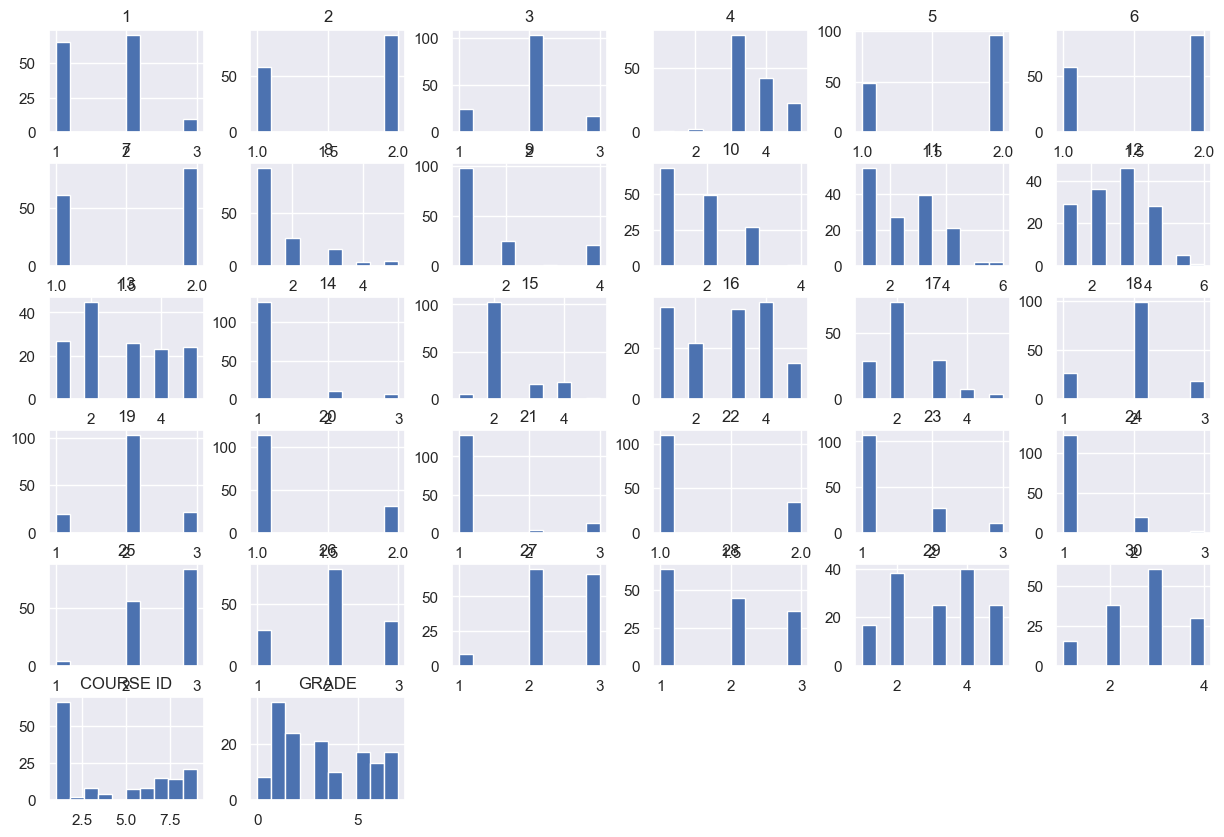

In [18]:
df.hist(figsize=(15, 10))
plt.show()

### Covariance (Numerical)

Find relationships of numerical data using covariance

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
1,0.375958,0.041667,0.096983,-0.156370,-0.052682,0.041667,0.012931,0.079981,0.000958,-0.095785,...,-0.016762,0.007663,-0.062739,0.097462,-0.037356,0.113745,0.137692,0.068247,-0.609674,-0.128352
2,0.041667,0.241667,0.033333,-0.081944,0.044444,0.054167,-0.030556,-0.011111,-0.006944,-0.059722,...,-0.009722,-0.002778,0.018056,-0.061111,0.019444,0.088889,0.154167,0.131944,-0.690278,0.362500
3,0.096983,0.033333,0.288602,-0.037644,-0.039607,0.019444,0.004406,-0.069301,0.013649,-0.007998,...,-0.009004,-0.011638,0.016379,0.044732,-0.026772,0.023994,0.013841,0.026341,-0.207998,0.123755
4,-0.156370,-0.081944,-0.037644,0.649234,0.021169,-0.061111,0.048036,-0.097845,0.024186,0.023084,...,0.013554,0.001820,0.074856,0.009866,0.072031,-0.062308,0.247893,0.179837,0.834195,0.042433
5,-0.052682,0.044444,-0.039607,0.021169,0.225287,0.051389,0.023515,-0.057280,0.051485,-0.056801,...,-0.044732,-0.047845,-0.009052,-0.050670,0.022653,0.010680,0.021408,0.003352,-0.177634,0.174665
6,0.041667,0.054167,0.019444,-0.061111,0.051389,0.241667,-0.002778,0.030556,0.013889,-0.087500,...,-0.037500,-0.023611,-0.009722,0.001389,-0.008333,0.054167,0.001389,-0.041667,-0.523611,-0.068056
7,0.012931,-0.030556,0.004406,0.048036,0.023515,-0.002778,0.245402,-0.039703,0.019875,-0.065326,...,-0.058238,-0.006274,0.001628,-0.018295,-0.000144,-0.033190,-0.037692,-0.005747,0.111063,-0.056370
8,0.079981,-0.011111,-0.069301,-0.097845,-0.057280,0.030556,-0.039703,1.040900,-0.017241,0.024138,...,0.133669,0.020402,-0.135967,-0.034866,-0.019253,-0.030747,-0.134004,-0.054837,-0.409195,-0.372989
9,0.000958,-0.006944,0.013649,0.024186,0.051485,0.013889,0.019875,-0.017241,1.125958,0.272270,...,-0.009818,-0.040948,0.013649,-0.013649,-0.085967,-0.136255,-0.049808,0.005747,0.397270,-0.364464
10,-0.095785,-0.059722,-0.007998,0.023084,-0.056801,-0.087500,-0.065326,0.024138,0.272270,0.614655,...,0.063745,0.003161,0.029502,0.077443,-0.011590,-0.087021,-0.084435,-0.005268,0.695211,0.040805


<AxesSubplot: >

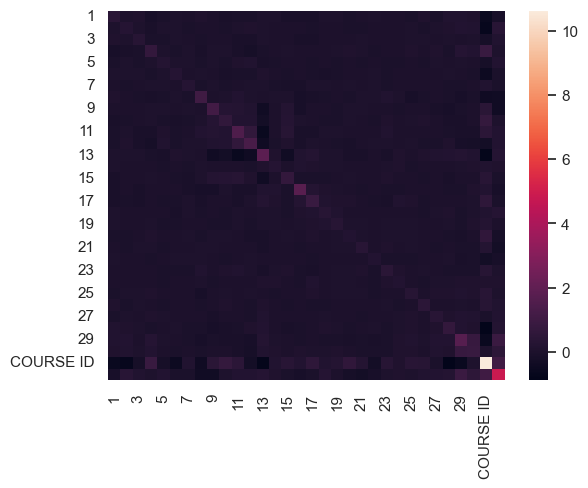

In [19]:
dum_df = df.copy()

cov_mat = dum_df.cov(numeric_only=True)
display(cov_mat)
sns.heatmap(cov_mat)

### Correlation Coefficient

<AxesSubplot: >

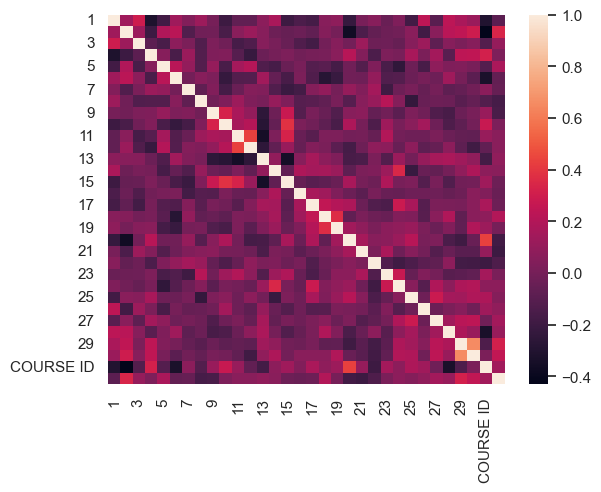

In [20]:
corr_matrix  = dum_df.corr(numeric_only = True)
sns.heatmap(corr_matrix)

### Boxplot

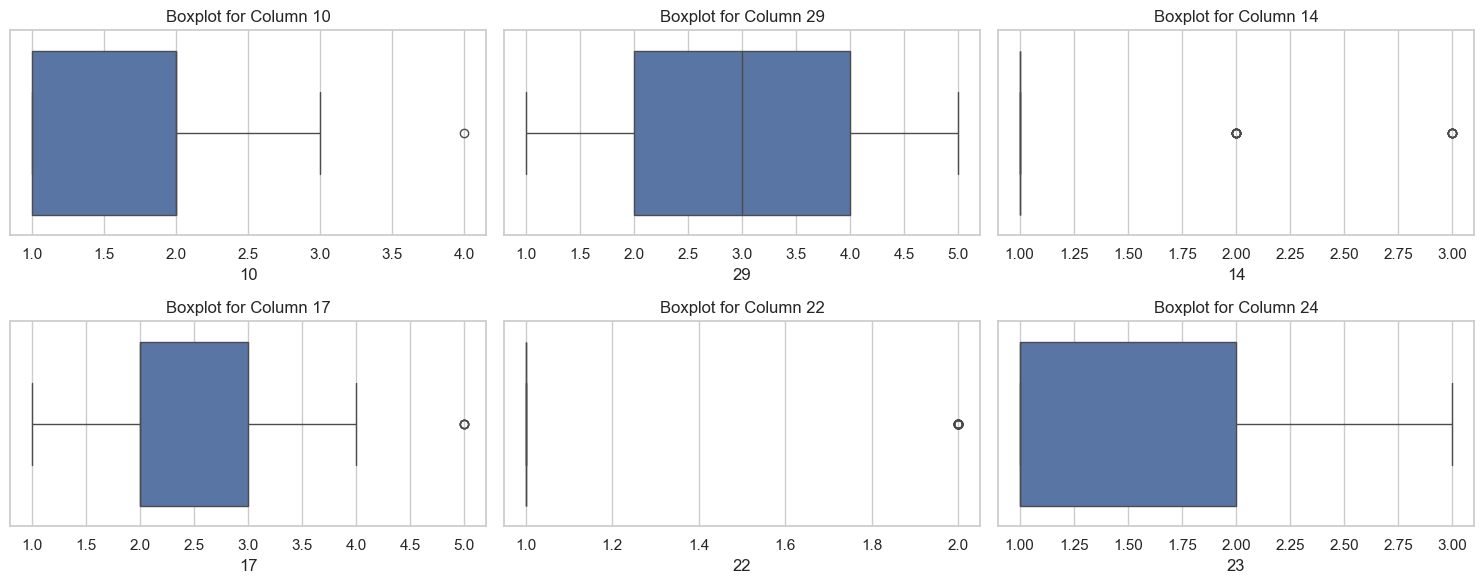

In [50]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 6))  

sns.boxplot(x='10', data=dum_df, ax=axes[0, 0])  
axes[0, 0].set_title('Boxplot for Column 10')
sns.boxplot(x='29', data=dum_df, ax=axes[0, 1])  
axes[0, 1].set_title('Boxplot for Column 29')
sns.boxplot(x='14', data=dum_df, ax=axes[0, 2]) 
axes[0, 2].set_title('Boxplot for Column 14')

sns.boxplot(x='17', data=dum_df, ax=axes[1, 0])  
axes[1, 0].set_title('Boxplot for Column 17')
sns.boxplot(x='22', data=dum_df, ax=axes[1, 1])  
axes[1, 1].set_title('Boxplot for Column 22')
sns.boxplot(x='23', data=dum_df, ax=axes[1, 2])  
axes[1, 2].set_title('Boxplot for Column 24')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [52]:
print(df.isnull().sum())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64


In [56]:
#change column name
colname_mapping = {
    '1': 'Student_Age','2': 'Sex','3': 'Grad_High_Sch_Type',
    '4': 'Scholar_Type','5': 'Additional_work',
    '6': 'Reg_Or_Sport','7': 'Partner',
    '8': 'Total_Salary','9': 'Transport',
    '10': 'Accommodation_Type','11': 'Mother_Edu',
    '12': 'Father_Edu','13': 'Siblings',
    '14': 'Parental_Status','15': 'Grad_High_Sch_Type',
    '16': 'Father_Occupation', '17': 'Weekly_Study',
    '18': 'RF_NonScientific', '19': 'RF_Scientific',
    '20': 'Attend_Seminar', '21': 'Impact_Project',
    '22': 'Attend_Class', '23': 'Pre_Midterm_Companion',
    '24': 'Pre_Midterm_Timeline', '25': 'Take_Note',
    '26': 'Listen_Class', '27': 'Discussion',
    '28': 'Flip_Class', '29': 'CGPA',
    '30': 'Expect_CGPA'
}

new_df = df.copy()
new_df.rename(columns=colname_mapping, inplace=True)
display(new_df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4
